# Level 1

**Basic Operation before starting the tasks.**


**(Dataset Observation)**

In [6]:
#Importing Libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import plotly.express as px
from sklearn.cluster import KMeans
import calendar
import datetime 
import pandas as pd
import numpy as np

In [8]:
#Loading the dataset
df=pd.read_csv('Dataset .csv')

In [10]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [19]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [13]:
df.shape

(9551, 21)

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
#Duplicates
len(df[df.duplicated()==True])

0

In [16]:
df[df['Restaurant Name'].duplicated()==True].head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30


In [17]:
df[df['Restaurant Name']=='Silantro Fil-Mex']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294


In [18]:
df['Restaurant Name'].nunique()

7446

In [20]:
df1=pd.DataFrame(df['Country Code'].value_counts())
df1.head()

,count
Country Code,
1,8652
216,434
215,80
30,60
214,60


In [21]:
percentage_country_code_1=len(df[df['Country Code']==1])/len(df)*100
percentage_country_code_1

90.58737304994241

In [22]:
percentage_country_code_1_2=len(df[df['Country Code'].isin([1,216])])/len(df)*100
percentage_country_code_1_2

95.13139985341849

But before diving into the core task of identifying the top cuisines, I noticed something intriguing. A glance at the dataset revealed a striking pattern—90.6% of the restaurants were based in India. Expanding this observation, I discovered that 95.13% of the restaurants hailed from just two countries: India and the USA.

# Task_1



*Task: Top Cuisines*

**- Determine the top three most common cuisines in the dataset.**



In [23]:
Cuisines=df.Cuisines.str.get_dummies(',')
Cuisines.head()

,Afghani,African,American,Andhra,Arabian,Argentine,Armenian,Asian,Assamese,Australian,...,Tapas,Tea,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vietnamese,Western,World Cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [25]:
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()
print(cuisine_counts)
top_cuisines = cuisine_counts.head(3)
print("The Top 3 Cuisines are: ", top_cuisines)

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64
The Top 3 Cuisines are:  Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [26]:
Cuisines_count=Cuisines.sum().sort_values(ascending=False).head()
Cuisines_count.head()

North Indian     2992
 Chinese         1878
 Fast Food       1314
 North Indian     968
Chinese           855
dtype: int64

In [27]:
len(Cuisines.columns)

249

In [28]:
df['Cuisines_new']=df.Cuisines.str.replace(', ',',')
Cuisines_df=df.Cuisines_new.str.get_dummies(',')

In [29]:
Cuisines_Count=Cuisines_df.sum().sort_values(ascending=False)
Cuisines_Count.head(5)

North Indian    3960
Chinese         2733
Fast Food       1986
Mughlai          994
Italian          764
dtype: int64

In [30]:
len(Cuisines_df.columns)

145

In [31]:
Top_Three_Cuisines=Cuisines_Count.head(3)
Top_Three_Cuisines

North Indian    3960
Chinese         2733
Fast Food       1986
dtype: int64

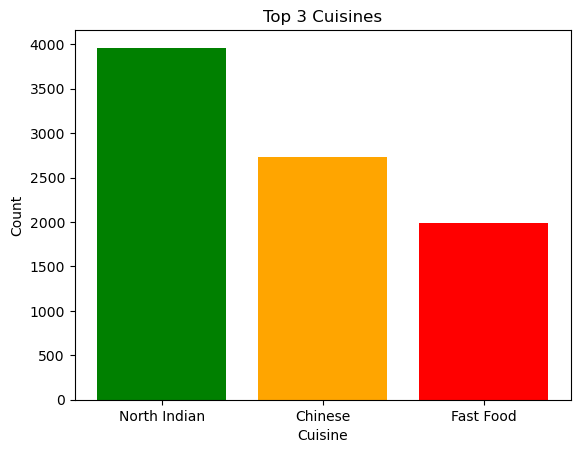

In [32]:
colours = ['green', 'orange', 'red']
plt.bar(top_cuisines.index, top_cuisines.values, color=colours)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Top 3 Cuisines')
plt.show()

**- Calculate the percentage of restaurants that serve each of the top cuisines.**

In [33]:

Top_cuisines_restaurants=df[df.Cuisines_new.str.contains('Chinese',
                                                         na=False, regex=True) |df.Cuisines_new.str.contains('Fast Food', na=False,
                                                        regex=True)|df.Cuisines_new.str.contains('North Indian', na=False, regex=True)]
Top_cuisines_restaurants.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines_new
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,No,No,No,No,3,4.4,Green,Very Good,336,Chinese
22,6600681,Chez Michou,30,Bras�_lia,"SCLN, 208, Bloco A, Loja 30, Asa Norte, Bras�_lia",Asa Norte,"Asa Norte, Bras�_lia",-47.881789,-15.764142,"Fast Food, French",...,No,No,No,No,2,3.0,Orange,Average,6,"Fast Food,French"


In [49]:
total_restaurant = len(df)
print(total_restaurant)
top_cuisine10 = cuisine_counts.head()
percentages = (top_cuisine10 / total_restaurant) * 100
print("The Market share of Top 5 Cusines are: ", percentages)

9551
The Market share of Top 5 Cusines are:  Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


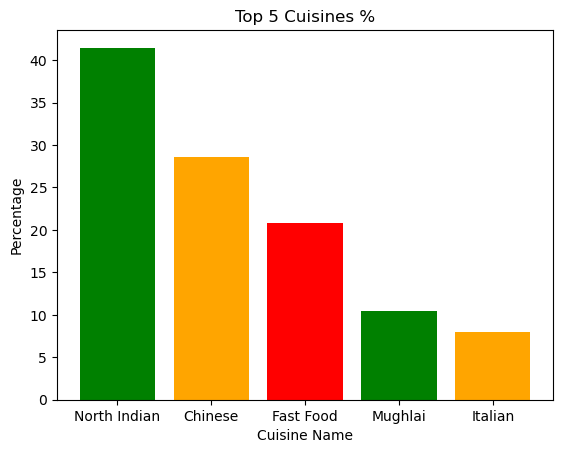

<Figure size 1200x600 with 0 Axes>

In [39]:
plt.bar(top_cuisine10.index, percentages.values, color= colours)
plt.xlabel('Cuisine Name')
plt.ylabel('Percentage')
plt.title('Top 5 Cuisines %')
plt.figure(figsize=(12, 6))
plt.show()

In [35]:
Top_cuisines_restaurants_perc=len(Top_cuisines_restaurants)/len(df)*100
Top_cuisines_restaurants_perc

64.73667678777092

In [36]:
Top_cuisines_restaurants=df[df.Cuisines_new.str.contains('Chinese',
                                                         na=False, regex=True) &df.Cuisines_new.str.contains('Fast Food', na=False,
                                                        regex=True)&df.Cuisines_new.str.contains('North Indian', na=False, regex=True)]
Top_cuisines_restaurants.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines_new
656,110237,Kabir Restaurant,1,Ahmedabad,"JB Tower, Opposite Doordarshan Kendra, Drive I...",Gurukul,"Gurukul, Ahmedabad",72.523965,23.048505,"North Indian, Chinese, Continental, Desserts, ...",...,No,Yes,No,No,2,3.8,Yellow,Good,432,"North Indian,Chinese,Continental,Desserts,Fast..."
696,2200149,Shudh Restaurant,1,Amritsar,"Opposite Gurudwara Saragarhi, Near Dharm Singh...",Town Hall,"Town Hall, Amritsar",74.879814,31.624047,"North Indian, South Indian, Chinese, Fast Food",...,No,No,No,No,2,3.4,Orange,Average,44,"North Indian,South Indian,Chinese,Fast Food"


In [37]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines_new
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,"French,Japanese,Desserts"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,"Seafood,Asian,Filipino,Indian"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,"Japanese,Sushi"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,"Japanese,Korean"


In [40]:
Top_cuisines_restaurants_perc=len(Top_cuisines_restaurants)/len(df)*100
Top_cuisines_restaurants_perc

2.4709454507381428

In [41]:
Top_cuisine_Restaurant_percentage={}
for cuisine in ['Chinese','Fast Food','North Indian']:
    cu_df=df[df.Cuisines_new.str.contains(cuisine, na=False, regex=True)]
    Top_cuisine_Restaurant_percentage[cuisine]=len(cu_df)/len(df)*100

Top_cuisine_Restaurant_percentage

{'Chinese': 28.614804732488746,
 'Fast Food': 20.804104282274107,
 'North Indian': 41.461627054758665}

In [42]:
percentage=pd.DataFrame(Top_cuisine_Restaurant_percentage.items(),columns = ['cuisine','percentage'])
percentage

,cuisine,percentage
0,Chinese,28.614805
1,Fast Food,20.804104
2,North Indian,41.461627


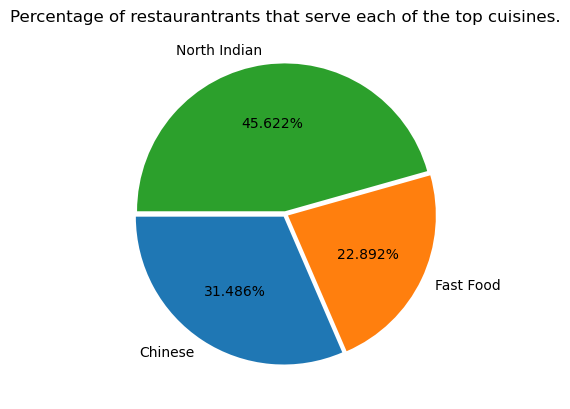

In [47]:
plt.title('Percentage of restaurantrants that serve each of the top cuisines.')
plt.pie(percentage['percentage'],labels=percentage['cuisine'],autopct='%1.3f%%',explode=[0.02,0.02,0.02],startangle=180)
plt.show()

# Task 2
*Task: City Analysis*

**- Identify the city with the highest number
 of restaurants in the dataset.**

In [50]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisines_new'],
      dtype='object')


In [51]:
City_Restaurant_counts= df.groupby('City').size().sort_values(ascending=False).head(3)
City_Restaurant_counts

City
New Delhi    5473
Gurgaon      1118
Noida        1080
dtype: int64

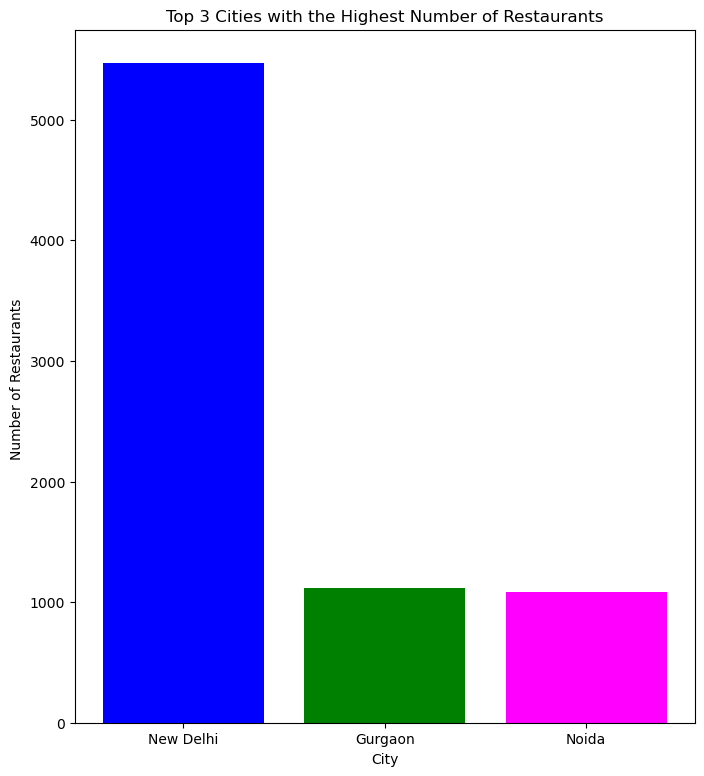

In [53]:
plt.figure(figsize = (8, 9))
color=['blue','green','magenta']
plt.bar(x = City_Restaurant_counts.index, height = City_Restaurant_counts,color=color)
(City_Restaurant_counts.index, City_Restaurant_counts, City_Restaurant_counts)
plt.plot()
plt.xlabel('City')
plt.ylabel('Number of Restaurants ')
plt.title('Top 3 Cities with the Highest Number of Restaurants')
plt.show();

  * Calculate the average rating for restaurants in each city.

**- Calculate the average rating for restaurants in each city**

In [54]:
Rating_City_Rest=df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
Rating_City_Rest.head()

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64

**The average rating of restaurants is calculated above and it clearly showed that Inner City is the one with restaurants with the highest average rating which is 4.9 .**

# Task 3

*Task:Price Range Distribution*

**- Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.**

In [62]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisines_new'],
      dtype='object')


In [63]:
price_catagory=df.groupby('Price range').size().sort_values(ascending=False)
price_catagory

Price range
1    4444
2    3113
3    1408
4     586
dtype: int64

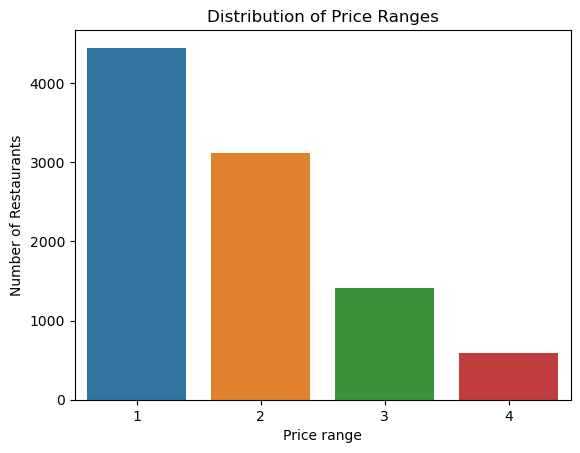

In [69]:
sns.barplot(x=price_catagory.index,y=price_catagory)

plt.ylabel('Number of Restaurants');
plt.title('Distribution of Price Ranges');


In [70]:
price_range_counts = df['Price range'].value_counts()
total_restaurants = len(df)
percentages = round((price_range_counts / total_restaurants) * 100,2)
percentage_m = pd.merge(price_range_counts, percentages, on = 'Price range')
print("The % of Restaurent in Each Price Range Category are: ", percentage_m)

The % of Restaurent in Each Price Range Category are:               count_x  count_y
Price range                  
1               4444    46.53
2               3113    32.59
3               1408    14.74
4                586     6.14


**- Calculate the percentage of restaurants in each price range category**

In [71]:

per_of_rest_price_catagory=df['Price range'].value_counts(normalize=True).sort_values(ascending= False)*100
per_of_rest_price_catagory

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64

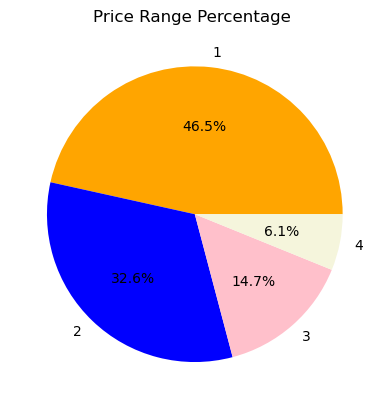

In [76]:
plt.pie(percentages, labels=percentages.index, autopct='%0.1f%%', colors = ['orange', 'Blue', 'Pink', 'beige'])
plt.title('Price Range Percentage ')
plt.show()

# Task 4 

*Task: Online Delivery*

**- Determine the percentage of restaurants that offer online delivery.**

In [77]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisines_new'],
      dtype='object')


In [78]:
online_delivery=df['Has Online delivery'].value_counts(normalize=True).sort_values(ascending= False)*100
online_delivery

Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

Total Restaurants with Online Delivery: 2451
Total Restaurants without Online Delivery: 7100


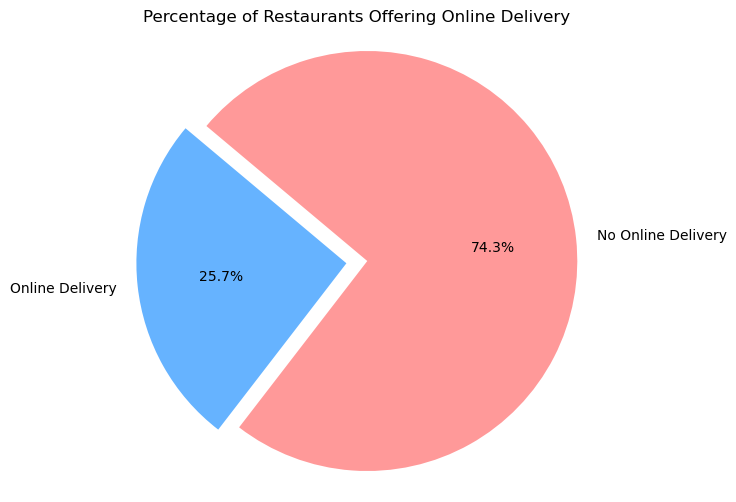

In [83]:
online_delivery = df['Has Online delivery'].value_counts(normalize=True).sort_values(ascending=False) * 100
total_online_delivery = df['Has Online delivery'].value_counts().get('Yes', 0)
total_no_online_delivery = df['Has Online delivery'].value_counts().get('No', 0)

# Display counts for verification
print("Total Restaurants with Online Delivery:", total_online_delivery)
print("Total Restaurants without Online Delivery:", total_no_online_delivery)

# Create a pie chart
labels = ['Online Delivery', 'No Online Delivery']
sizes = [online_delivery.get('Yes', 0), online_delivery.get('No', 0)]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Explode the first slice (Online Delivery)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Percentage of Restaurants Offering Online Delivery')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

**-  Compare the average ratings of restaurants with and without online delivery.**

In [84]:
online_delivery_based_average_rating=df.groupby('Has Online delivery')['Aggregate rating'].mean().sort_values(ascending=False)
online_delivery_based_average_rating

Has Online delivery
Yes    3.248837
No     2.465296
Name: Aggregate rating, dtype: float64

During my exploration of the dataset, an interesting trend emerged regarding online delivery services. It turns out that 74.34% of the restaurants do not offer online delivery, while only 25.66% of them do.

Delving deeper, I analyzed the average ratings of restaurants based on their online delivery status, and the results were fascinating:

Restaurants offering online delivery have an average rating of 3.25.
In contrast, restaurants without online delivery have a lower average rating of 2.47.
This suggests a potential correlation between offering online delivery and receiving higher customer ratings. Restaurants that make their services more accessible and convenient through online delivery might be perceived more favorably by their customers. While causation cannot be established directly from this analysis, it provides a compelling insight into how service options could influence customer satisfaction.